# Pratique pour l'examen 1

Félicitation! Voilà 10 ans que vous avez terminé votre baccalauréat en sciences de la terre à l'université Laval. Vous êtes maintenant consultant en géostatistiques et vous avez été choisi pour effectuer l'analyse des données géologiques et géochimiques d'une compagnie d'exploration. Armé d'un fichier ``csv`` et d'un interpréteur ``python``, vous devrez établir (ou non!) des liens statistiques entre les différentes données disponibles.

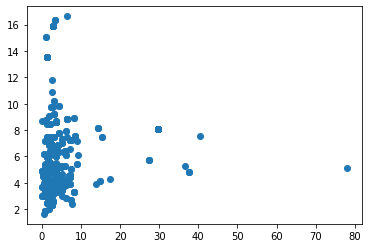

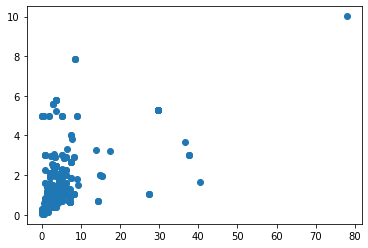

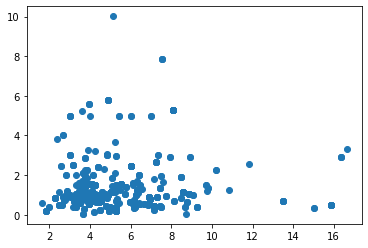

In [1]:
import pandas as pd
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('donnees_geochimiques.csv', delimiter=',').dropna(axis=1)
randint = np.random.randint(0, len(df), 500)
df = df.iloc[randint]
plt.scatter(df['U'], df['Pb'])
plt.show()
plt.scatter(df['U'], df['Mo'])
plt.show()
plt.scatter(df['Pb'], df['Mo'])
#df.to_csv('donnees_geochimiques.csv', index=False)




## Que contient le dossier?

Déboussolé, vous pensez avoir complètement oublié comment vous servir de ``python``. Votre client vous regarde d'un air impatient: il veut savoir ce que contient le fichier ``donnees_geochimiques.csv`` que lui a envoyé l'équipe de terrain. Faites lui un compte-rendu.

### Vous devez extraire les données depuis le fichier ``csv`` disponible. De plus, déclarez une variable au nom évocateur pour chacune des colonnes fournies.


In [2]:
# Entre ton code ici

In [3]:
### Réponse
import numpy as np
# Avec numpy, comme montré en classe:
data = np.genfromtxt('donnees_geochimiques.csv', delimiter=',', skip_header=1)
X = data[:, 0]
Y = data[:, 1]
U = data[:, 2]
Pb = data[:, 3]
Mo = data[:, 4]

# Avec numpy, version rapide:
# on transforme la matrice en 5 rangées et N colonnes, assignant automatiquement les variables
X, Y, U, Pb, Mo = np.genfromtxt('donnees_geochimiques.csv', delimiter=',', skip_header=1).transpose() 


Bravo, vous avez sauvé la mise (pour l'instant?)! Le chargé de projet de l'entreprise qui vous a engagé, Johnathan, est satisfait. Clairement, vous maîtrisez ``python``! Par contre, maîtriserez vous les statistiques? 

## Les données elle même
Johnathan a très hâte de visualiser la distribution des différentes variables. Comme vous savez si bien le faire, fournissez lui des graphiques montrant la distribution des données géochimiques!

### Fournis à un Johnathan un histograme pour chacun des éléments du jeu de données. Si la distribution des valeurs brutes ne semble pas être normale, quelle transformation essaie-t-on habituellement?

#### Rapporte la moyenne et l'écart-type de chacun des éléments.

#### Points bonus!  Assure toi d'avoir le nombre bon nombre de classes!

In [4]:
# Entre ton code ici

### Justifie ta réponse ici:

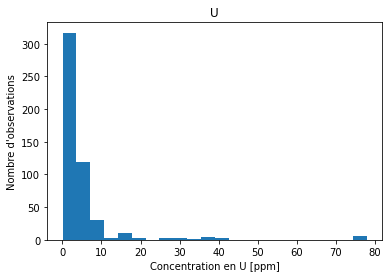

Élément U
Moyenne: 5.049200000000001
Écart-type: 9.809918417601647



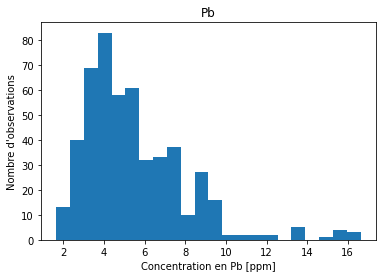

Élément Pb
Moyenne: 5.4704
Écart-type: 2.5627177448950555



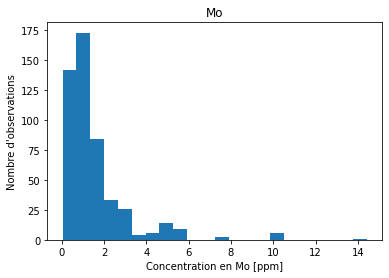

Élément Mo
Moyenne: 1.5444200000000001
Écart-type: 1.6525861743340344



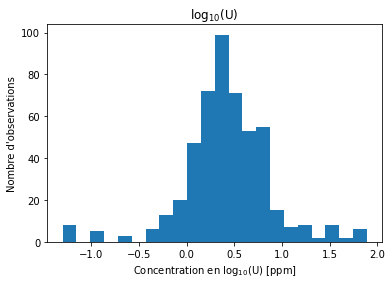

Élément log$_{10}$(U)
Moyenne: 0.4256293236808691
Écart-type: 0.47206835438430317



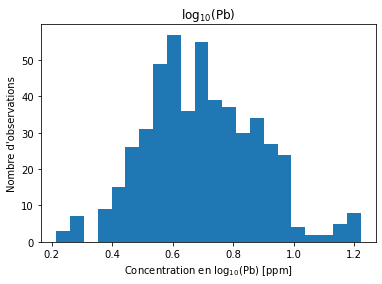

Élément log$_{10}$(Pb)
Moyenne: 0.6973550988743996
Écart-type: 0.18462086453244095



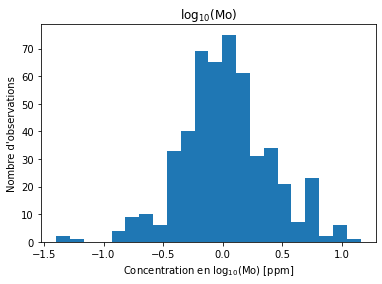

Élément log$_{10}$(Mo)
Moyenne: 0.02787070823970775
Écart-type: 0.37064446485960323



In [5]:
### Réponse

# Points bonus!
N = int(np.sqrt(len(data))) # le "bon" nombre de classe équivaut à la racine du nombre d'observation

def histogramme(element, nom, N):
    
    # création de la figure
    plt.figure()
    plt.hist(element, N)  # on rentre les données et le nombre de classes
    plt.title(nom)
    plt.xlabel(f'Concentration en {nom} [ppm]')
    plt.ylabel('Nombre d\'observations')
    plt.show()
    
    print(f'Élément {nom}')
    print(f'Moyenne: {element.mean()}')
    print(f'Écart-type: {element.std()}')
    print()

# Valeurs brutes
histogramme(U, 'U', N)
histogramme(Pb, 'Pb', N)
histogramme(Mo, 'Mo', N)

# Valeurs log10 
histogramme(np.log10(U), 'log$_{10}$(U)', N)
histogramme(np.log10(Pb), 'log$_{10}$(Pb)', N)
histogramme(np.log10(Mo), 'log$_{10}$(Mo)', N)

Wow! Très jolis graphiques. Johnathan est convaincu que les distributions des concentrations suivent une loi normale. 
Heureusement, tu lui dis que toi, tu connais bien les statistiques et qu'un simple graphique ne suffit pas pour appuyer une déclaration de la sorte. Décidé, tu dépoussières tes notes de cours de *GGL-2601* et te rappelles l'existence d'un certain test statistique...

### Effectue le test statistique approprié sur les concentrations disponibles pour vérifier la normalité des distributions à un seuil de 5%. 

#### Points bonus! Construis le graphique souvent affiché avec ce test! 

##### Points extra bonus! Peux tu expliquer la non-normalité surprenante, si c'est le cas, des distributions? Regarde l'équation pour la valeur critique du test statistique!


In [6]:
# Entre ton code ici

### Justifie ta réponse ici: 

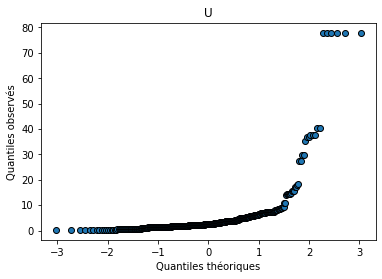

U
Test: 0.30809743791191735
Valeur critique: 0.06082104898799428
La distribution est significativement différente d'une loi normale



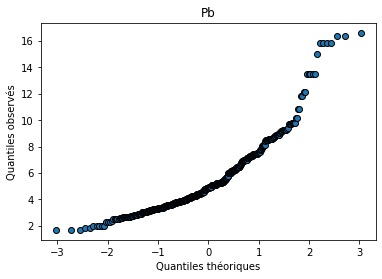

Pb
Test: 0.13946466404321245
Valeur critique: 0.06082104898799428
La distribution est significativement différente d'une loi normale



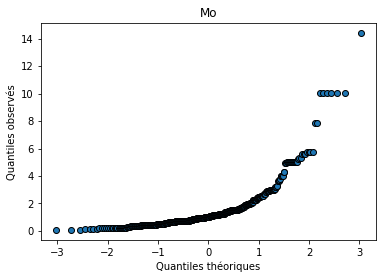

Mo
Test: 0.21711166835367113
Valeur critique: 0.06082104898799428
La distribution est significativement différente d'une loi normale



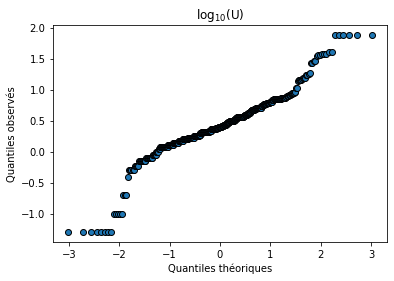

log$_{10}$(U)
Test: 0.11431546683383559
Valeur critique: 0.06082104898799428
La distribution est significativement différente d'une loi normale



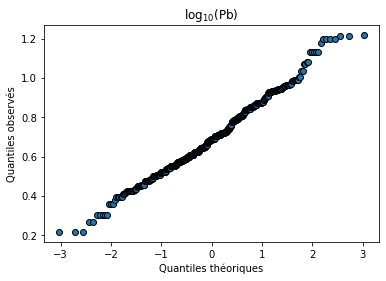

log$_{10}$(Pb)
Test: 0.05496567543493491
Valeur critique: 0.06082104898799428
Le test confirme la normalité au seuil de 5%.



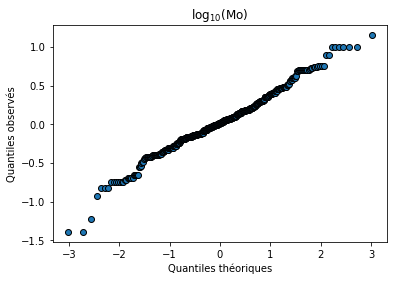

log$_{10}$(Mo)
Test: 0.05373875590057017
Valeur critique: 0.06082104898799428
Le test confirme la normalité au seuil de 5%.



In [7]:
### Réponse
import ulgeostat as ul

def KS(element, nom):
    # calcul du graphique de probabilité normale avec les fonctions de ulgeostat
    quantiles_obs, quantiles_theo = ul.normgraf(element) 
    
    # création de la figure
    plt.figure() 
    plt.scatter(quantiles_theo, quantiles_obs, ec='k') # on affiche les points
    plt.title(nom) 
    plt.xlabel('Quantiles théoriques') 
    plt.ylabel('Quantiles observés')
    plt.show()
    
    critval = 1.36/np.sqrt(len(element)) # calcul de la valeur critique, tableau A.6 des notes de cours, seuil de 5%
    test = ul.testks(element, verbose=False)  # calcul du test avec les fonctions de ulgeostat
    
    print(nom)
    print(f'Test: {test}')
    print(f'Valeur critique: {critval}')
    
    # test d'hypothèse
    if test > critval: # rejet de H0
        print('La distribution est significativement différente d\'une loi normale')
    else:  # accepte H0
        print('Le test confirme la normalité au seuil de 5%.')
    print()

KS(U, 'U')
KS(Pb, 'Pb')
KS(Mo, 'Mo')

KS(np.log10(U), 'log$_{10}$(U)')
KS(np.log10(Pb), 'log$_{10}$(Pb)')
KS(np.log10(Mo), 'log$_{10}$(Mo)')

# Points bonus!
# La non normalité pour le U peut être expliqué par le très grand nombre d'observations. 
# En effet, il y a 500 données fournies. L'équation pour le test KS est 1.36/sqrt(n).
# Cette équation tend vers 0 assez rapidement lorqsue n est très grand, rendant difficile d'avoir une valeur significative.

Johnathan est très impressionné par tes habiletés statistiques. Il aimerait maintenant pouvoir mieux comprendre les relations entre les différentes concentrations du jeu de données. Il a déja lu qu'il existait un lien important entre l'uranium et le plomb! Apparement que l'uranium devient du plomb avec l'âge. Étrange non?

### Consulte toutes les relations possibles entre les éléments fourni! Affiche un graphique montrant la relation entre les variables. Assure toi de supporter tes graphiques avec un coefficient quantifiant la corrélation.
### Calcule également un coefficient statistique approprié pour savoir si la relation est statistiquement significative à un seuil de 5%. 

#### Points bonus! Est-ce que la corrélation significative (ou non) te semble juste dans tout les cas? Regarde l'équation du test statistique! 


In [8]:
# Entre ton code ici

### Justifie ta réponse ici: 



Degré de liberté: 498



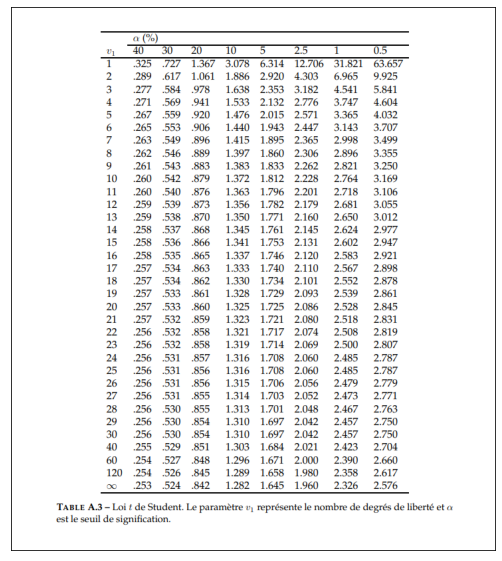

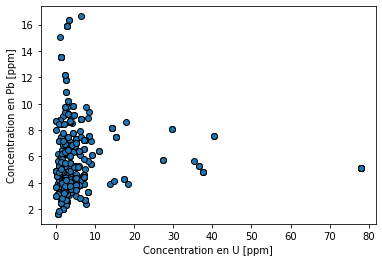

U et Pb
Valeur de r: 0.0403
Valeur du test: 0.9004



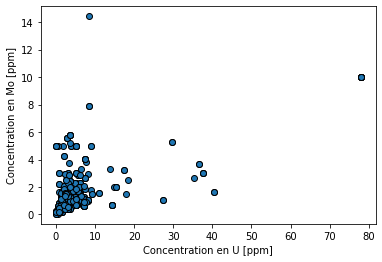

U et Mo
Valeur de r: 0.6018
Valeur du test: 16.8135



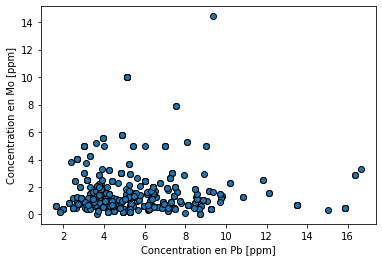

Pb et Mo
Valeur de r: 0.0213
Valeur du test: 0.4755



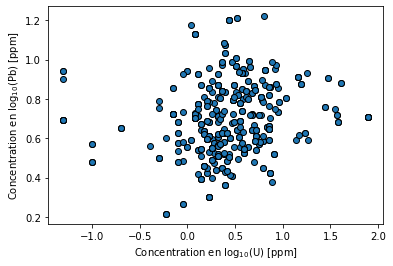

log$_{10}$(U) et log$_{10}$(Pb)
Valeur de r: 0.1609
Valeur du test: 3.6391



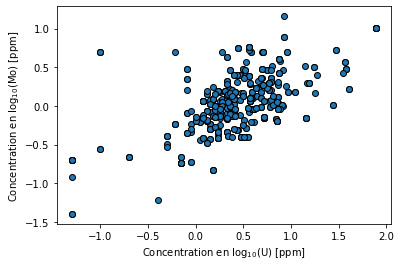

log$_{10}$(U) et log$_{10}$(Mo)
Valeur de r: 0.5832
Valeur du test: 16.0204



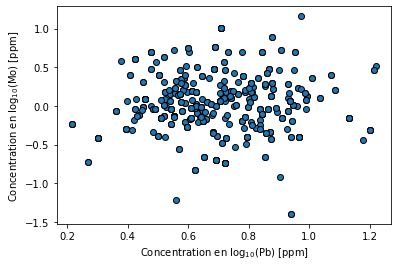

log$_{10}$(Pb) et log$_{10}$(Mo)
Valeur de r: 0.0190
Valeur du test: 0.4249



In [9]:
def covariance(x1, x2, nom1, nom2):
    
    # création de la figure
    plt.figure()
    plt.scatter(x1, x2, ec='k') # affichage des points
    plt.xlabel(f'Concentration en {nom1} [ppm]')
    plt.ylabel(f'Concentration en {nom2} [ppm]')
    plt.show()
    
    # calcul du test statistique
    cov, r = ul.covf(x1, x2)  # calcul de r avec les fonctions de ulgeostat
    n = len(x1)  # nombre d'éléments
    test = r*np.sqrt((n-2)/(1-r**2)) # équation 3.7 des notes de cours
    print(f'{nom1} et {nom2}')
    print(f'Valeur de r: {r:.4f}')
    print(f'Valeur du test: {test:.4f}')
    print('')

# affichage de la table A-3.
img = plt.imread('table_a3.png')
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xticks([])
ax.set_yticks([])
plt.imshow(img)

# Calcul du degré de liberté
df = len(data)-2  # Équation 3.6
print(f'Degré de liberté: {df}\n')
# Sur la table, la valeur critique du test est de 1.645
# Tout les tests calculés dont la valeur est plus grande que 1.645 montrent donc une corrélation significative

covariance(U, Pb, 'U', 'Pb')
covariance(U, Mo, 'U', 'Mo')
covariance(Pb, Mo, 'Pb', 'Mo')

covariance(np.log10(U), np.log10(Pb), 'log$_{10}$(U)', 'log$_{10}$(Pb)')
covariance(np.log10(U), np.log10(Mo), 'log$_{10}$(U)', 'log$_{10}$(Mo)')
covariance(np.log10(Pb), np.log10(Mo), 'log$_{10}$(Pb)', 'log$_{10}$(Mo)')


# Pour les valeurs brutes, la relation est significative pour seulement U et Mo.
# Toutefois, le coefficient r est à prendre avec un grain de sel pour les valeurs brutes.
# Étant donnée la très grande dispersion des valeurs au travers de plusieurs échelles de grandeur,
# il n'est pas clair si le coefficient calculé est vraiment significatif. L'interprétation de statistiques doit toujours
# être suivie d'un jugement expert!

# Pour le logarithme des valeurs, toutes les relations sont significatives sauf pour le plomb et molybdène. 
# Le test du log10 de U et Pb montre toutefois une valeur du test plus petite, ainsi qu'un coefficient
# de corrélation r très faible.
# La corrélation est statistiquement différente de zéro, mais pas très claire.

# L'équation du test statistique (3.7) est r*sqrt(n-2)/(1-r**2)
# Lorsque le nombre d'observation (n) est grand, la valeur du test grandit. Comme n est très grand, (n>2000), le test est 
# significatif même pour de très petites valeurs de r.



Johnathan est content mais surpris des résultats par rapport à l'uranium et le plomb. Il ne s'attendait pas à de tels résultats! Il souhaite pousser l'analyse un peu plus loin.

À l'aide du logarithme des valeurs de plomb et de molybdène, Johnathan souhaiterait pouvoir prédire la valeur du logarithme de l'uranium.

### Suggères à Johnathan une méthode statistique appropriée. Est-ce que la méthode est justifiée pour les deux éléments? Justifie ta réponse en discutant du coefficient statistique approprié et en faisant un test d'analyse de la variance à un seuil de 5%. Est-ce que l'erreur sur les prédictions est bien distribuée?

### Pour une concentration en molybdène ou en plomb de 1 ppm, trouves la concentration en uranium équivalente selon la méthode utilisée. 

#### Points bonus:  Quel élément semble un meilleur indicateur de la concentration en uranium?


In [10]:
# Entre ton code ici

### Justifie ta réponse ici

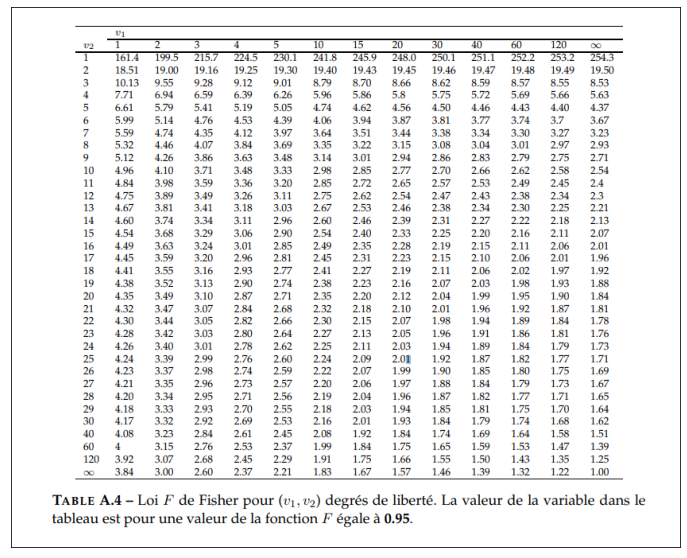

Élément Pb
SSR :  2.874757 
SST : 111.424266 
R^2 : 0.025800

----------------------------------------------------------

Résultat de la régression lineaire.

----------------------------------------------------------

Équation: y = 4.1071e-01 x + 1.3922e-01 

----------------------------------------------------------

Source de variation    df      SS              CM             Test-F 

----------------------------------------------------------

Régression linéaire    1     2.8748e+00     2.8748e+00       13.19 

Déviation (résiduel)  498     1.0855e+02     2.1797e-01      

Variation totale      499     1.1142e+02 

----------------------------------------------------------

Npts:  500

mu_x: 6.9736e-01 

mu_y: 4.2563e-01 

std_x: 1.8462e-01 

std_y: 4.7207e-01 

R^2:     0.0258 

Concentration en U pour une concentration de 1.00 ppm en Pb: 1.38 ppm


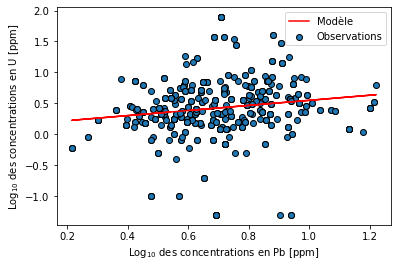

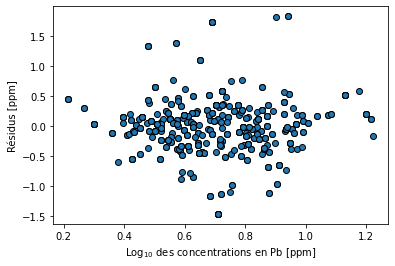

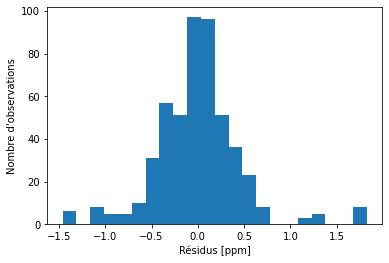

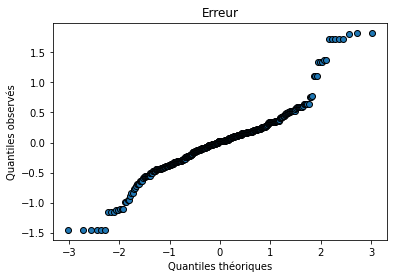

Erreur
Test: 0.1031563843818396
Valeur critique: 0.06082104898799428
La distribution est significativement différente d'une loi normale

Élément Mo
SSR :  37.743439 
SST : 111.424266 
R^2 : 0.338736

----------------------------------------------------------

Résultat de la régression lineaire.

----------------------------------------------------------

Équation: y = 7.4127e-01 x + 4.0497e-01 

----------------------------------------------------------

Source de variation    df      SS              CM             Test-F 

----------------------------------------------------------

Régression linéaire    1     3.7743e+01     3.7743e+01      255.10 

Déviation (résiduel)  498     7.3681e+01     1.4795e-01      

Variation totale      499     1.1142e+02 

----------------------------------------------------------

Npts:  500

mu_x: 2.7871e-02 

mu_y: 4.2563e-01 

std_x: 3.7064e-01 

std_y: 4.7207e-01 

R^2:     0.3387 

Concentration en U pour une concentration de 1.00 ppm en Mo: 2.54 p

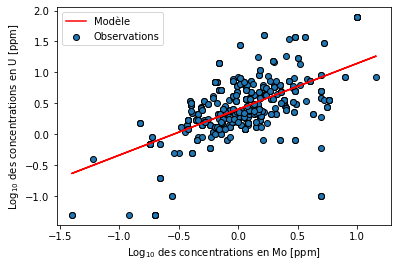

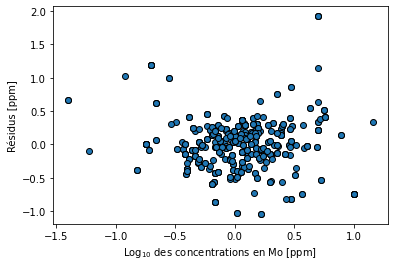

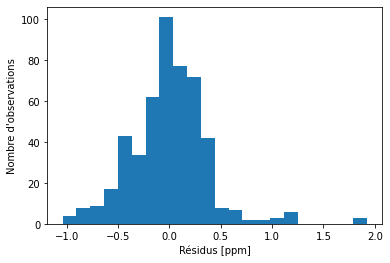

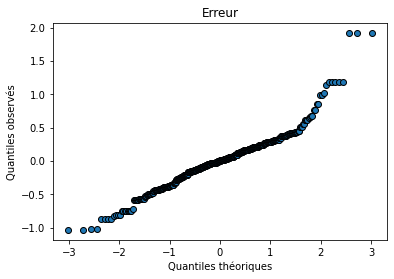

Erreur
Test: 0.08101600924124497
Valeur critique: 0.06082104898799428
La distribution est significativement différente d'une loi normale



In [14]:
### Réponse

# Nous allons utiliser une régression linéaire entre le logarithme des valeurs.
def regression(x, y, nom1, nom2, xpred):
    
    logx = np.log10(x)
    logy = np.log10(y)
    
    print(f'Élément {nom1}')
    M = ul.lin_reg(logx, logy)
    logymod = M[0] * logx + M[1]
    err = logymod - logy
    log_pred = M[0] * np.log10(xpred) + M[1]
    pred = 10**log_pred
    print(f'Concentration en {nom2} pour une concentration de {xpred:.2f} ppm en {nom1}: {pred[0]:.2f} ppm')
    
    # Affichage des points et du modèle
    fig = plt.figure()
    plt.scatter(logx, logy, label='Observations', ec='k') # Affichage des points
    plt.plot(logx, logymod, label='Modèle', c='red')  # Affichage du modèle
    plt.legend()
    plt.xlabel(f'Log$_{{10}}$ des concentrations en {nom1} [ppm]')
    plt.ylabel(f'Log$_{{10}}$ des concentrations en {nom2} [ppm]')
    
    # Affichage de l'erreur selon le logarithme des concentrations
    fig = plt.figure()
    plt.scatter(logx, err, ec='k')
    plt.xlabel(f'Log$_{{10}}$ des concentrations en {nom1} [ppm]')
    plt.ylabel(f'Résidus [ppm]')
    plt.show()
    
    # On peut regarder la distribution de l'erreur pour voir si elle suit une loi normale
    fig = plt.figure()
    plt.hist(err, int(np.sqrt(len(err))))
    plt.xlabel(f'Résidus [ppm]')
    plt.ylabel('Nombre d\'observations')
    plt.show()
    
    # Test KS pour savoir si la distribution de l'erreur est normale
    # On peut réutiliser la fonction KS construite plus tôt!
    KS(err, 'Erreur')

# affichage de la table A-5.
img = plt.imread('table_a4.png')
fig, ax = plt.subplots(figsize=(12,12))
ax.set_xticks([])
ax.set_yticks([])
plt.imshow(img)
plt.show()

# Les degrés de liberté sont de 1 et n-2.
# Dans la table A-5, la valeur critique équivalente est de 3.84.
# Si le test calculé est plus grand que la valeur critique, on rejette l'hypothèse nulle, c'est à dire
# que la pente de la régression linéaire est significativement différente de zéro.

regression(Pb, U, 'Pb', 'U', 1)
regression(Mo, U, 'Mo', 'U', 1)


# Plomb
# Le coefficient de la régression R^2 est très faible (0.03). La valeur du test, 13.19, est plus grande que la valeur critique
# de 3.84. On rejette l'hypothèse nulle, c'est à dire que la pente est significativement différente de zéro.
# L'erreur semble normalement distribuée selon l'histogramme, mais le test KS pour l'erreur n'est pas significatif 
# à un seuil de 5%, c'est à dire que l'erreur n'est statistiquement pas normalement distribuée. Par contre, 
# étant donné le très grand nombre d'observations, il est raisonnable que la distribution soit 
# significativement différente d'une loi normale (Voir points bonus).

# Molybdène
# Le coefficient de la régression R^2 est faible (0.33), mais beaucoup plus grand que pour le plomb.
# La pente est significativement différente de zéro selon le test statistique.
# L'erreur semble normalement distribué selon l'histogramme, mais le test KS n'est pas significatif.

# Le molybdène semble un meilleur indicateur que le plomb étant donné que le R^2 est plus grand (0.28 > 0.05).

Johnathan est bien content des résultats et il est prêt à les envoyer à l'équipe d'exploration. Il aimerait pouvoir leur montrer des statistique de la variance spatiale des éléments indicateurs de l'uranium. Selon ton expérience, il aimerait savoir quel genre de statistique il pourrait utiliser! Pourrais-tu lui suggérer une méthode?

### Décrit à Johnathan une méthode pouvant décrire la variance spatiale du molybdène et du plomb. Montre lui un exemple pour les deux éléments en construisant les graphiques appropriés ainsi qu'un modèle théorique! 

### Fais attention pour bien expliquer la signification des différents coefficients impliqués dans le modèle théorique.

In [12]:
# Entre ton code ici

### Justifie ta réponse ici:

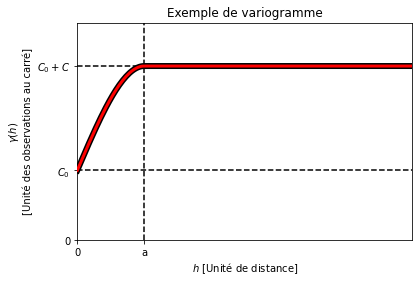

Variogramme pour le Pb


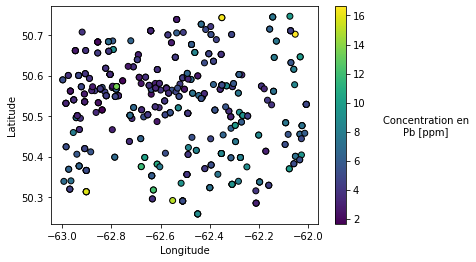

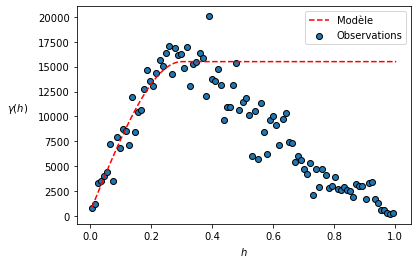

Variogramme pour le Mo


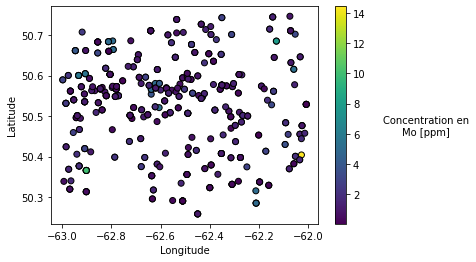

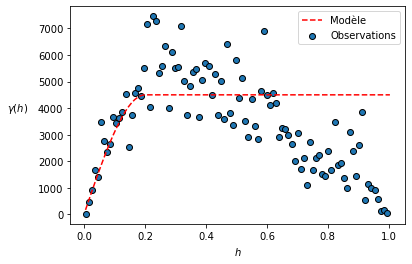

In [70]:
### Réponse

# Je montre un exemple de l'influence des paramètres du variogramme.
# Joue avec les paramètres C0, C et a pour voir leurs impacts sur le graphique
C0 = 50 # L'effet pépite, la valeur du modèle lorsque h=0
C = 75 # La distance entre la valeur du modèle lorque h=0 et h->infini
a = 20 # La portée du variogramme, la valeur pour laquelle gamma ne change plus

x = np.linspace(0, 100, 200)
g = ul.vario_theo(C0, C, x, a)
plt.plot(x, g, c='k', zorder=13, lw=6)
plt.plot(x, g, c='red', zorder=15, lw=3)

ax = plt.gca()
plt.xticks([0, a])           
ax.set_xticklabels([0, 'a'])
ax.axvline(a, c='k', ls='dashed')

plt.yticks([0, C0, C0+C])
ax.set_yticklabels([0, '$C_0$', '$C_0+C$'])
ax.axhline(C0, c='k', ls='dashed')
ax.axhline(C0+C, c='k', ls='dashed')
ax.set_xlim(x.min(), x.max())
ax.set_ylim(0, np.max(g)*1.25)
plt.title('Exemple de variogramme')
plt.xlabel('$h$ [Unité de distance]')
plt.ylabel('$\gamma(h)$\n[Unité des observations au carré]')
plt.show()

# Nous allons construire un variogramme pour chacun des éléments indicateurs de l'uranium
def variogramme(x, y, concentration, nom, C0, C, a):
    
    print(f'Variogramme pour le {nom}')
    
    plt.figure()
    plt.scatter(x, y, c=concentration, ec='k')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    cb = plt.colorbar()
    cb.ax.set_ylabel(f'Concentration en\n{nom} [ppm]', rotation=0, labelpad=60)
    plt.show()
    
    # Calcul du variogramme expérimental avec 100 pas
    h, gamma = ul.vario_exp(x, y, concentration, 100)
    
    # Calcul du variogramme théorique avec les valeurs qui semblent appropriées
    gamma_theo = ul.vario_theo(C0, C, h, a)
    plt.figure()
    plt.scatter(h, gamma, ec='k', label='Observations')
    plt.plot(h, gamma_theo, label='Modèle', c='red', ls='dashed')
    plt.xlabel('$h$')
    plt.ylabel('$\gamma(h)$', rotation=0, labelpad=20)
    plt.legend()
    plt.show()

variogramme(X, Y, Pb, 'Pb', C0=500, C=15000, a=0.3) 
variogramme(X, Y, Mo, 'Mo', C0=0, C=4500, a=0.2)

# Les paramètres suivant semblent raisonnables pour le plomb et le molybdène.
# Des paramètres sensiblement différents n'auraient pas été problématiques.

# Note que dans cet exemple, les coordonnées sont en degrés (longitude et latitude). C'est problématique pour le calcul
# des distances euclidiennes. À titre d'exemple (et par simplicité) j'ai conservé ces valeurs.
